# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment, for example, when you flip a coin it can by either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Binomial(10, 0.2) distribution where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial.
import numpy as np
np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


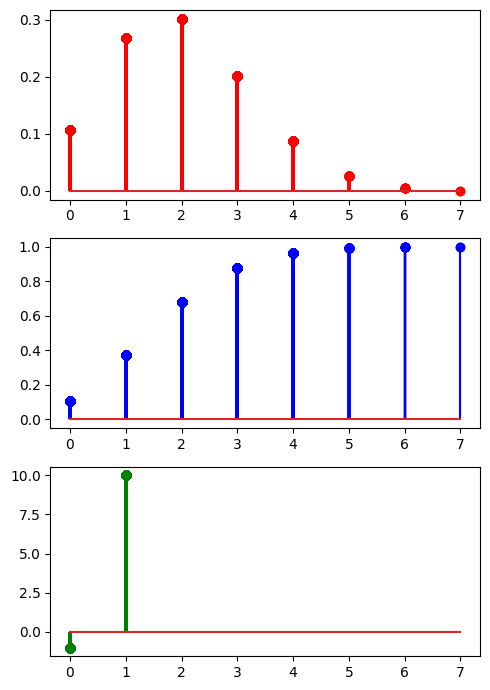

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

Ejemplo 1: densidad de probabilidad para una distribucion normal (0, 1) para x=1: 0.24197072451914337
Ejemplo 2:Probabilidad de que los valores esten por debajo de 1 en una distribucion Normal(0, 1): 0.8413447460685429
Ejemplo 3:calculo de por debajo de que valor se encuentra el 90% de la muestra en una distribucion Normal(0, 1): 1.2815515655446004
Generar 2000 valores aleatorios para una distribucion Normal(0, 1): [ 0.49671415 -0.1382643   0.64768854 ... -0.88187465 -0.16306696
 -0.74490264]


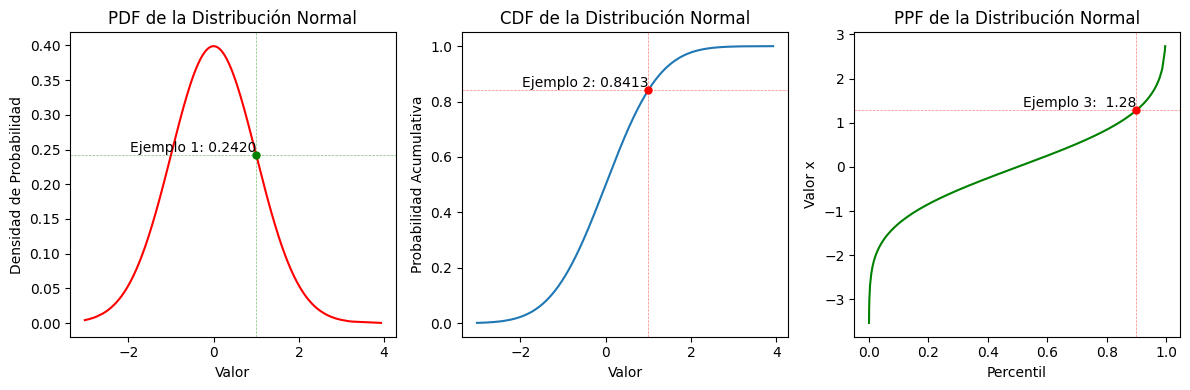

In [112]:
#se importan modulos necesarios
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)

# definimos todas las funciones de probabilidad para una distribucion normal

def dnorm(x, mean=0, sd=1):
    """
    calcula la densida de probabilidad de la distribucion en un punto
    """
    result = norm.pdf(x, loc=mean, scale=sd)
    return result

def pnorm(q, mean=0, sd=1):
    """
    calcula la probabilidad de que el valor sea igual o menor a un x dado
    """
    result = norm.cdf(q, loc=mean, scale=sd)
    return result

def qnorm(p, mean=0, sd=1):
    """
    calcula el valor por debajo del cual se encuentra el p de la muestra 
    """
    result = norm.ppf(p, loc=mean, scale=sd)
    return result

def rnorm(n, mean=0, sd=1):
    """
    genera n variables aleatorias para la distribucion normal
    """
    result = norm.rvs(loc=mean, scale=sd, size=n)
    return result


# ejemplo con media 0 std_dev 1

############################################## resultados de las funciones###################################################################################
print(f"Ejemplo 1: densidad de probabilidad para una distribucion normal (0, 1) para x=1: {dnorm(1)}")
print(f"Ejemplo 2:Probabilidad de que los valores esten por debajo de 1 en una distribucion Normal(0, 1): {pnorm(1)}")
print(f"Ejemplo 3:calculo de por debajo de que valor se encuentra el 90% de la muestra en una distribucion Normal(0, 1): {qnorm(0.9)}")
print(f"Generar 2000 valores aleatorios para una distribucion Normal(0, 1): {rnorm(2000)}")


# Graficación

# Definimos los parametros de las funciones como variables por si queremos haecer pruebas con otros valores
mean = 0
std_dev = 1
data = rnorm(2000, mean=0, sd=1)
#definimos las funciones como variables para integrarlas en el plot
pdf = dnorm(data, mean=0, sd=1)
cdf = pnorm(data, mean=0, sd=1)
ppf = qnorm(data, mean=0, sd=1)

#definimos el espacio para el plot
fig, axis = plt.subplots(1, 3, figsize = (12, 4))

#plot de la funcion PDF y del resultado del ejemplo 1
sns.lineplot(x=data, y=pdf, color="r", ax=axis[0])
#etiquetas , lineas y texto
axis[0].set_title('PDF de la Distribución Normal')
axis[0].set_xlabel('Valor')
axis[0].set_ylabel('Densidad de Probabilidad')
axis[0].axvline(x=1, color='green', linestyle='--',linewidth=0.5, alpha=0.5, label='x=1')
axis[0].axhline(y=dnorm(1), color='green', linestyle='--',linewidth=0.5, alpha=0.5, label='x=1')
axis[0].text(1, norm.pdf(1), f'Ejemplo 1: {norm.pdf(1):.4f}', verticalalignment='bottom', horizontalalignment='right')
axis[0].plot(1, norm.pdf(1), 'o', color='green', markersize=5)
#plot de la funcion CDF y del resultado del ejemplo 2
sns.lineplot(x=data, y=cdf, ax=axis[1])
#etiquetas, lineas y texto
axis[1].set_title('CDF de la Distribución Normal')
axis[1].set_xlabel('Valor')
axis[1].set_ylabel('Probabilidad Acumulativa')
axis[1].axvline(x=1, color='red', linestyle='--',linewidth=0.5, alpha=0.5, label='x=1')
axis[1].axhline(y=0.8413, color='red', linestyle='--',linewidth=0.5, alpha=0.5, label='x=1')
axis[1].text(1, 0.8413, f'Ejemplo 2: {norm.cdf(1):.4f}', verticalalignment='bottom', horizontalalignment='right')
axis[1].plot(1, 0.8413, 'o', color='red', markersize=5)

#plot de la funcion PPF y del resultado del ejemplo 3
sns.lineplot(x=data, y=ppf, ax=axis[2], color="g")
#etiquetas, lineas y texto
axis[2].set_title('PPF de la Distribución Normal')
axis[2].set_xlabel('Percentil')
axis[2].set_ylabel('Valor x')
axis[2].axvline(x=0.9, color='red', linestyle='--',linewidth=0.5, alpha=0.5, label='x=1')
axis[2].axhline(y=qnorm(0.9), color='red', linestyle='--', linewidth=0.5, alpha=0.5,label='x=1')
axis[2].text(0.9, qnorm(0.9), f'Ejemplo 3: {qnorm(0.9): .2f}', verticalalignment='bottom', horizontalalignment='right')
axis[2].plot(0.9, qnorm(0.9), 'o', color='red', markersize=5)
# ajuste del layout
plt.tight_layout()

plt.show()




Ejemplo 1: Densidad de probabilidad para una distribución uniforme (0, 1) para x=0.5: 1.0
Ejemplo 2: Probabilidad de que los valores estén por debajo de 0.5 en una distribución Uniforme(0, 1): 0.5
Ejemplo 3: Cálculo de por debajo de qué valor se encuentra el 90% de la muestra en una distribución Uniforme(0, 1): 0.9
Generar 2000 valores aleatorios para una distribución Uniforme(0, 1): [0.37454012 0.95071431 0.73199394 ... 0.06895802 0.05705472 0.28218707]


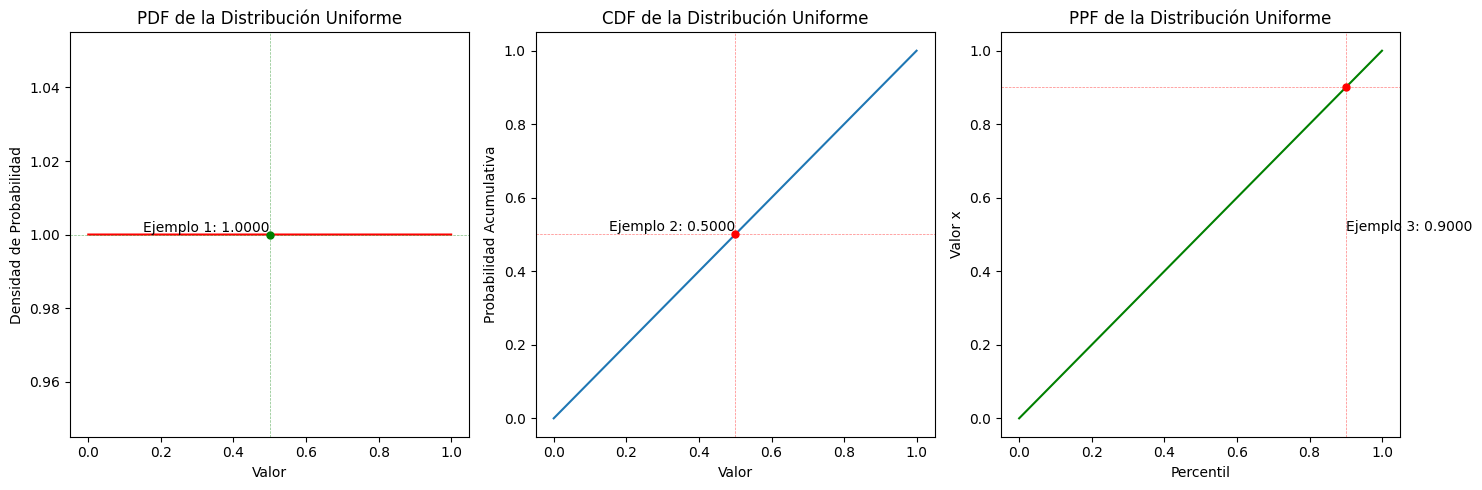

In [131]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos todas las funciones de probabilidad para una distribución uniforme

def dunif(x, start=0, width=1):
    """
    Calcula la densidad de probabilidad de la ditribucon uniforme en un punto.
    """
    result = uniform.pdf(x, loc=start, scale=width)
    return result

def punif(q, start=0, width=1):
    """
    Calcula la probabilidad de que el valor sea igual o menor a un q dado en una distribución uniforme
    """
    result = uniform.cdf(q, loc=start, scale=width)
    return result

def qunif(p, start=0, width=1):
    """
    Calcula el valor por debajo del cual se encuentra el p% de la muestra en una distribución uniforme.
    """
    result = uniform.ppf(p, loc=start, scale=width)
    return result

def runif(n, start=0, width=1):
    """
    Genera n variables aleatorias para la distribución uniforme.
    """
    result = uniform.rvs(loc=start, scale=width, size=n)
    return result

# Ejemplo con límites 0 y 1 para la distribución uniforme
np.random.seed(42)
start = 0
width = 1

############################################## resultados de las funciones###################################################################################
print(f"Ejemplo 1: Densidad de probabilidad para una distribución uniforme (0, 1) para x=0.5: {dunif(0.5, start, width)}")
print(f"Ejemplo 2: Probabilidad de que los valores estén por debajo de 0.5 en una distribución Uniforme(0, 1): {punif(0.5, start, width)}")
print(f"Ejemplo 3: Cálculo de por debajo de qué valor se encuentra el 90% de la muestra en una distribución Uniforme(0, 1): {qunif(0.9, start, width)}")
print(f"Generar 2000 valores aleatorios para una distribución Uniforme(0, 1): {runif(2000, start, width)}")

# Generar datos para el plot
data = runif(2000, start, width)
pdf = dunif(data, start, width)
cdf = punif(data, start, width)
ppf = qunif(data, start, width)

# Definir el espacio para el plot
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Plot de la función PDF y del resultado del ejemplo 1
sns.lineplot(x=data, y=pdf, color="r", ax=axis[0])
axis[0].set_title('PDF de la Distribución Uniforme')
axis[0].set_xlabel('Valor')
axis[0].set_ylabel('Densidad de Probabilidad')
axis[0].axvline(x=0.5, color='green', linestyle='--', linewidth=0.5, alpha=0.5)
axis[0].axhline(y=dunif(0.5, start, width), color='green', linestyle='--', linewidth=0.5, alpha=0.5,label='x=1')
axis[0].text(0.5, dunif(0.5, start, width), f'Ejemplo 1: {dunif(0.5, start, width):.4f}', verticalalignment='bottom', horizontalalignment='right')
axis[0].plot(0.5, dunif(0.5, start, width), 'o', color='green', markersize=5)

# Plot de la función CDF y del resultado del ejemplo 2
sns.lineplot(x=data, y=cdf, ax=axis[1])
axis[1].set_title('CDF de la Distribución Uniforme')
axis[1].set_xlabel('Valor')
axis[1].set_ylabel('Probabilidad Acumulativa')
axis[1].axvline(x=0.5, color='red',linewidth=0.5, alpha=0.5, linestyle='--')
axis[1].axhline(y=punif(0.5, start, width), color='red', linestyle='--', linewidth=0.5, alpha=0.5,label='x=1')
axis[1].text(0.5, 0.5, f'Ejemplo 2: {punif(0.5, start, width):.4f}', verticalalignment='bottom', horizontalalignment='right')
axis[1].plot(0.5, punif(0.5, start, width), 'o', color='red', markersize=5)

# Plot de la función PPF y del resultado del ejemplo 3
sns.lineplot(x=data, y=ppf, ax=axis[2], color="g")
# etiquetas, lineas y texto
axis[2].axvline(x=0.9, color='red', linestyle='--',linewidth=0.5, alpha=0.5)
axis[2].axhline(y=qunif(0.9, start, width), color='red', linestyle='--', linewidth=0.5, alpha=0.5,label='x=1')
axis[2].text(0.9, 0.5, f'Ejemplo 3: {qunif(0.9, start, width):.4f}', verticalalignment='bottom', horizontalalignment='left')
axis[2].set_title('PPF de la Distribución Uniforme')
axis[2].set_xlabel('Percentil')
axis[2].set_ylabel('Valor x')
axis[2].plot(0.9, qunif(0.9, start, width), 'o', color='red', markersize=5)

# ajuste y muestra del grafico
plt.tight_layout()
plt.show()

